In [1]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [2]:
x,y = load_diabetes(return_X_y=True)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
import random
class MBGDRegressor:
    def __init__(self,batch_size,learning_rate=0.01,epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size  #newly added in contructor
        
    def fit(self,x_train,y_train):
        #init your coefficients
        self.intercept_ = 0
        self.coef_ = np.ones(x_train.shape[1]) #initialize coeffs with array of ones.No. of coeffs = no. of columns
        intercept_per_row = []
        slope_intercept = []
        for i in range(self.epochs):
            for j in range(int(x_train.shape[0]/self.batch_size)): #no of rows/batch_size = #batches
                idx = random.sample((range(x_train.shape[0])),self.batch_size)  #generate random list of ids to choose from x_train
                y_hat = np.dot(x_train[idx],self.coef_) + self.intercept_  #single scalar not matrix
                
                der_intercept = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * der_intercept)
                slope_intercept.append(der_intercept)
                
                der_coeffs = -2 * np.dot((y_train[idx] - y_hat),x_train[idx])
                self.coef_ = self.coef_ - (self.lr * der_coeffs)
                intercept_per_row.append(self.intercept_)
        
        #plt.plot(intercept_per_row,slope_intercept)
        #plt.xlabel('intercept')
        #plt.ylabel('Cost/Loss function')
    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_
        

In [64]:
reg = MBGDRegressor(batch_size=int(x_train.shape[0]/50),learning_rate=0.01,epochs=32)
reg.fit(x_train,y_train)

In [65]:
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.42487129200569496

In [35]:
reg.coef_.shape,int(x_train.shape[0]/20)

((10,), 17)

In [24]:
x_test.shape

(89, 10)

In [66]:
reg.intercept_

151.36616799037608

In [56]:
len(range(10,50)),np.linspace(10,50,40)

(40,
 array([10.        , 11.02564103, 12.05128205, 13.07692308, 14.1025641 ,
        15.12820513, 16.15384615, 17.17948718, 18.20512821, 19.23076923,
        20.25641026, 21.28205128, 22.30769231, 23.33333333, 24.35897436,
        25.38461538, 26.41025641, 27.43589744, 28.46153846, 29.48717949,
        30.51282051, 31.53846154, 32.56410256, 33.58974359, 34.61538462,
        35.64102564, 36.66666667, 37.69230769, 38.71794872, 39.74358974,
        40.76923077, 41.79487179, 42.82051282, 43.84615385, 44.87179487,
        45.8974359 , 46.92307692, 47.94871795, 48.97435897, 50.        ]))

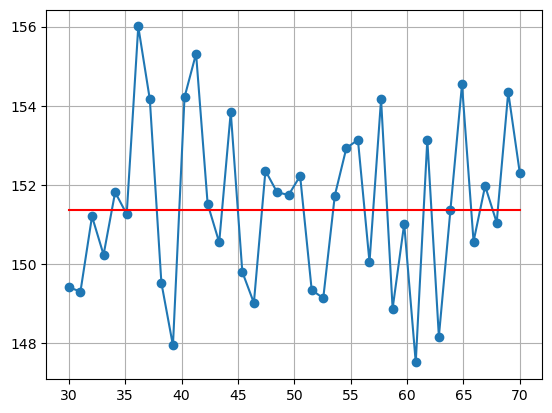

In [69]:
r2_sc = []
intercepts = []
for ep in range(30,70):
    reg = MBGDRegressor(batch_size=int(x_train.shape[0]/50),learning_rate=0.01,epochs=ep)
    reg.fit(x_train,y_train)
    #r2_sc.append(r2_score(y_test,reg.predict(x_test)))
    intercepts.append(reg.intercept_)
#plt.plot(np.linspace(30,70,40),r2_sc,'o-')
plt.plot(np.linspace(30,70,40),intercepts,'o-')
plt.plot(np.linspace(30,70,40),[151.36]*40,'r-')
plt.grid()